<a href="https://colab.research.google.com/github/malavikasubramanian/classify-pv-faults-using-ml/blob/main/ModelComparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary Libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.svm import SVC # SVM
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.ensemble import RandomForestClassifier #Random Forest

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Directory for Dataset
filename = input('Dataset file location: ')
ds = pd.read_csv(filename)

Dataset file location: /content/temp.csv


In [ ]:
ds.head(15)

,N_Ser,N_Par,Irradiation,Temperature,Current,Voltage,Label,Current_raw,Voltage_raw
0,4,3,100,10,1.86,14.9,1,1.86,14.9
1,4,3,100,15,1.86,14.9,1,1.86,14.9
2,4,3,100,20,1.86,14.9,1,1.86,14.9
3,4,3,100,25,1.86,14.9,1,1.86,14.9
4,4,3,100,30,1.86,14.9,1,1.86,14.9
5,4,3,100,35,1.86,14.9,1,1.86,14.9
6,4,3,100,40,1.86,14.9,1,1.86,14.9
7,4,3,100,45,1.87,14.9,1,1.87,14.9
8,4,3,100,50,1.87,14.9,1,1.87,14.9
9,4,3,100,55,1.87,14.9,1,1.87,14.9


In [ ]:
ds.tail(15)

,N_Ser,N_Par,Irradiation,Temperature,Current,Voltage,Label,Current_raw,Voltage_raw
1305,4,3,1200,45,14.77694,118.2155,3,14.8,118.0
1306,4,3,1200,50,14.78399,118.2719,3,14.8,118.0
1307,4,3,1200,55,14.78987,118.3189,3,14.8,118.0
1308,4,3,1200,60,14.79396,118.3517,3,14.8,118.0
1309,4,3,1250,10,15.32064,122.5651,3,15.3,123.0
1310,4,3,1250,15,15.32998,122.6398,3,15.3,123.0
1311,4,3,1250,20,15.33924,122.7139,3,15.3,123.0
1312,4,3,1250,25,15.34837,122.7870,3,15.3,123.0
1313,4,3,1250,30,15.35727,122.8582,3,15.4,123.0
1314,4,3,1250,35,15.36582,122.9265,3,15.4,123.0


In [ ]:
predict_result={1:"Normal",
                2:"Open Circuit",
                3:"Short Circuit"}

In [ ]:
ds.shape

(1320, 9)

In [ ]:
#Assigning the features and target Values
X = ds.values[:, :6]
Y = ds.values[:, 6]

In [ ]:
print(X.shape)

(1320, 6)


In [ ]:
def show_plot(N_ser, N_par, Irradiance):
  Filter = ds[(ds['N_Ser']==N_ser) & (ds['N_Par']==N_par) & (ds['Irradiation']==Irradiance)]
  fig = plt.figure(figsize=[8,8])
  ax = fig.add_subplot(111, projection='3d', title=f"Irradiance at {Irradiance} in {N_ser}x{N_par}",
                      xlabel="Impp (A)", ylabel="Vmpp (V)", zlabel="Temperature")

  for s in Filter['Label'].unique():
      ax.scatter(Filter.Current[Filter['Label']==s],
                Filter.Voltage[Filter['Label']==s],
                Filter.Temperature[Filter['Label']==s], label=predict_result[s])

  ax.legend()

N_ser: 4
N_par: 3
Irradiance: 800


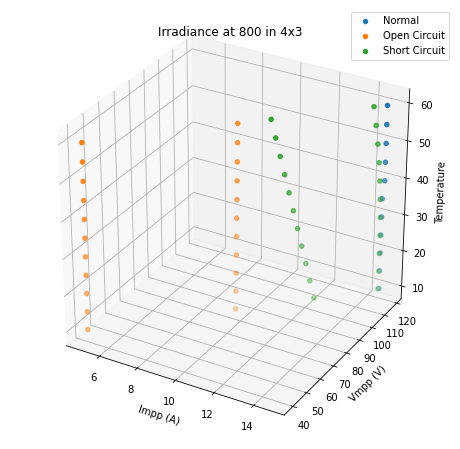

In [ ]:
show_plot(int(input("N_ser: ")), int(input("N_par: ")), int(input("Irradiance: ")))

In [ ]:
# Spliting the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

In [ ]:
X_train.shape

(1056, 6)

In [ ]:
X_test.shape

(264, 6)

In [ ]:
train_accuracies, test_accuracies = [] ,[]

In [ ]:
def train_the_model(model, x_train, y_train, x_test, y_test):
  model.fit(X_train,Y_train)
  train_predictions = model.predict(X_train)
  test_predictions = model.predict(X_test)
  train_accuracies.append(accuracy_score(Y_train, train_predictions)*100)
  test_accuracies.append(accuracy_score(Y_test, test_predictions)*100)
  print ("Training Accuracy : ", train_accuracies[-1])
  print ("Testing Accuracy : ", test_accuracies[-1])

In [ ]:
# SVM Result

train_the_model(SVC(), X_train, Y_train, X_test, Y_test)

Training Accuracy :  69.6969696969697
Testing Accuracy :  66.28787878787878


In [ ]:
# SVM Result after hyper-tuning

params = {'kernel': ['rbf', 'poly', 'sigmoid']}
grid_search_cv = GridSearchCV(SVC(random_state=100), params)
grid_search_cv.fit(X_train, Y_train)
svm = grid_search_cv.best_estimator_
train_the_model(svm, X_train, Y_train, X_test, Y_test)

Training Accuracy :  69.6969696969697
Testing Accuracy :  66.28787878787878


In [ ]:
# KNN Result

train_the_model(KNeighborsClassifier(), X_train, Y_train, X_test, Y_test)

Training Accuracy :  85.03787878787878
Testing Accuracy :  69.6969696969697


In [ ]:
# KNN Result after hyper-tuning

params = {'n_neighbors': list(range(7, 16)),
          'weights': ['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_search_cv = GridSearchCV(KNeighborsClassifier(p=1), params)
grid_search_cv.fit(X_train, Y_train)
knn = grid_search_cv.best_estimator_
train_the_model(knn, X_train, Y_train, X_test, Y_test)

Training Accuracy :  82.95454545454545
Testing Accuracy :  71.5909090909091


In [ ]:
# Decision Tree Result

train_the_model(DecisionTreeClassifier(), X_train, Y_train, X_test, Y_test)

Training Accuracy :  100.0
Testing Accuracy :  83.71212121212122


In [ ]:
# Decision Tree Result after hyper-tuning

params = {'criterion':['gini', 'entropy'],
          'splitter':['best', 'random'],
          'max_features':['auto', 'sqrt', 'log2']}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params)
grid_search_cv.fit(X_train, Y_train)
decision_tree = grid_search_cv.best_estimator_
train_the_model(decision_tree, X_train, Y_train, X_test, Y_test)

Training Accuracy :  100.0
Testing Accuracy :  84.0909090909091


In [ ]:
# Random Forest Result

train_the_model(RandomForestClassifier(), X_train, Y_train, X_test, Y_test)

Training Accuracy :  100.0
Testing Accuracy :  80.68181818181817


In [ ]:
# Random Forest Result after hyper-tuning

params = {'criterion': ['gini', 'entropy'],
          'max_features':['auto', 'sqrt', 'log2']}
grid_search_cv = GridSearchCV(RandomForestClassifier(), params)
grid_search_cv.fit(X_train, Y_train)
random_forest = grid_search_cv.best_estimator_
train_the_model(random_forest, X_train, Y_train, X_test, Y_test)

Training Accuracy :  100.0
Testing Accuracy :  81.81818181818183


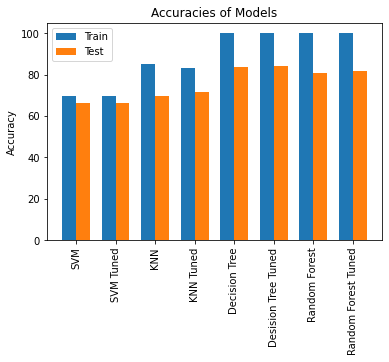

In [ ]:
# Accuracy Comparision

labels = ["SVM", "SVM Tuned", "KNN", "KNN Tuned",
          "Decision Tree", "Desision Tree Tuned",
          "Random Forest", "Random Forest Tuned"]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Train')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracies of Models')
ax.set_xticks(x)

ax.set_xticklabels(labels, rotation=90)
ax.legend()
ax.set_ylim()
plt.show()

In [ ]:
3
# Testing with custom value
Nser = int(input("Nser: "))
Npar = int(input("Npar: "))
irr = float(input("Irradiance: "))
temp = float(input("Temperature: "))
voltage = float(input("Voltage: "))
current = float(input("Current: "))
test_ip = [[Nser, Npar, irr, temp, voltage, current]]

Nser: 4
Npar: 3
Irradiance: 500
Temperature: 60
Voltage: 49
Current: 6


In [ ]:
# SVM Prediction
test_pred = svm.predict(test_ip)
print(predict_result[test_pred[0]])

Open Circuit


In [ ]:
# KNN Prediction
test_pred = knn.predict(test_ip)
print(predict_result[test_pred[0]])

Open Circuit


In [ ]:
# Decision Tree Prediction
test_pred = decision_tree.predict(test_ip)
print(predict_result[test_pred[0]])

Open Circuit


In [ ]:
# Random Forest Prediction
test_pred = random_forest.predict(test_ip)
print(predict_result[test_pred[0]])

Open Circuit
